![BTS](https://github.com/vfp1/bts-dsf-2020/raw/main/Logo-BTS.jpg)

# Session 2: Logistic Regression EXERCISE
### Student: David McMonagle

### Teacher: Victor F. Pajuelo Madrigal <victor.pajuelo@bts.tech> - Classical Data Analysis

Open original notebook in Google Colaboratory: [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/vfp1/bts-cda-2020/blob/main/Session_2/Session_2_Logistic_Regression_EXERCISE.ipynb)

**Resources:**
* Sklearn documentation

# Logistic Regression Assignment

We are given a dataset of  direct marketing campaigns of a credit institution. **Our goal is to implement a model to predict whether the client will subscribe to a term deposit.**

**When working on the assignment there could be multiple ways to explore data or implement specific analysis. Choose that one you retain more appropriate but always justify every choice you make (e.g., why you choose some variables), comment your code, describe the plots and results you obtain.**


### Enjoy!

DATASET DESCRIPTION

- age (numeric) 

---



---


- job : type of job 
- marital : marital status
- education 
- default: has credit in default? 
- housing: has housing loan? 
- loan: has personal loan? 
- contact: contact communication type 
- month: last contact month of year 
- day_of_week: last contact day of the week 
- duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y=’no’). The duration is not known before a call is performed, also, after the end of the call, y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model
- campaign: number of contacts performed during this campaign and for this client 
- pdays: number of days that passed by after the client was last contacted from a previous campaign (999 means client was not previously contacted)
- previous: number of contacts performed before this campaign and for this client (numeric)
- poutcome: outcome of the previous marketing campaign 
- emp.var.rate: employment variation rate 
- cons.price.idx: consumer price index 
- cons.conf.idx: consumer confidence index 
- euribor3m: euribor 3 month rate 
- nr.employed: number of employees 
- y — Target variable: has the client subscribed a term deposit? 

##### Import libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=18)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
import requests
url = 'https://raw.githubusercontent.com/vfp1/bts-cda-2020/main/Session_2/banking.csv'
res = requests.get(url, allow_redirects=True)
with open('banking.csv','wb') as file:
    file.write(res.content)
df = pd.read_csv(url)

In [3]:
df.shape

(41188, 21)

## EDA and Feature Engineering 

An important requirement for Logistic Regression to function properly is Feature Engineering as it helps to identify independent variables. Without proper identification of independent variables Logistic Regression fails to perform correctly.

One disadvantage of logistic regression is that it doesn’t handle large number of categorical variables well.

```education``` column has many categories, try to reduce the categories for a better modelling. The education column has the following categories.


In [4]:
df.education.unique()

array(['basic.4y', 'unknown', 'university.degree', 'high.school',
       'basic.9y', 'professional.course', 'basic.6y', 'illiterate'],
      dtype=object)

We will group all ```basic.XX``` in a unique value ```basic```

In [5]:
df['education'] = df['education'].str.replace('basic.4y', 'basic')
df['education'] = df['education'].str.replace('basic.6y', 'basic')
df['education'] = df['education'].str.replace('basic.9y', 'basic')

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [7]:
df.job.unique()

array(['blue-collar', 'technician', 'management', 'services', 'retired',
       'admin.', 'housemaid', 'unemployed', 'entrepreneur',
       'self-employed', 'unknown', 'student'], dtype=object)

In [8]:
df.marital.unique()

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

In [9]:
df.age.unique()

array([44, 53, 28, 39, 55, 30, 37, 36, 27, 34, 41, 33, 26, 52, 35, 40, 32,
       49, 38, 47, 46, 29, 54, 42, 72, 48, 43, 56, 31, 24, 68, 59, 50, 45,
       25, 57, 63, 58, 60, 64, 51, 23, 20, 74, 80, 61, 62, 75, 21, 82, 77,
       70, 76, 73, 66, 22, 71, 19, 79, 88, 65, 67, 81, 18, 84, 69, 98, 85,
       83, 78, 92, 86, 94, 17, 91, 89, 87, 95])

In [10]:
df.pdays.unique()

array([999,   6,   3,   2,   4,  16,   0,   5,  11,  14,  13,   9,  15,
        17,  12,  26,   7,  19,  10,   1,  18,   8,  20,  21,  22,  25,
        27])

In [11]:
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic,unknown,yes,no,cellular,aug,thu,210,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,138,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,339,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,185,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic,no,yes,no,cellular,aug,fri,137,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


##### Analyse the distribution of the target variable

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


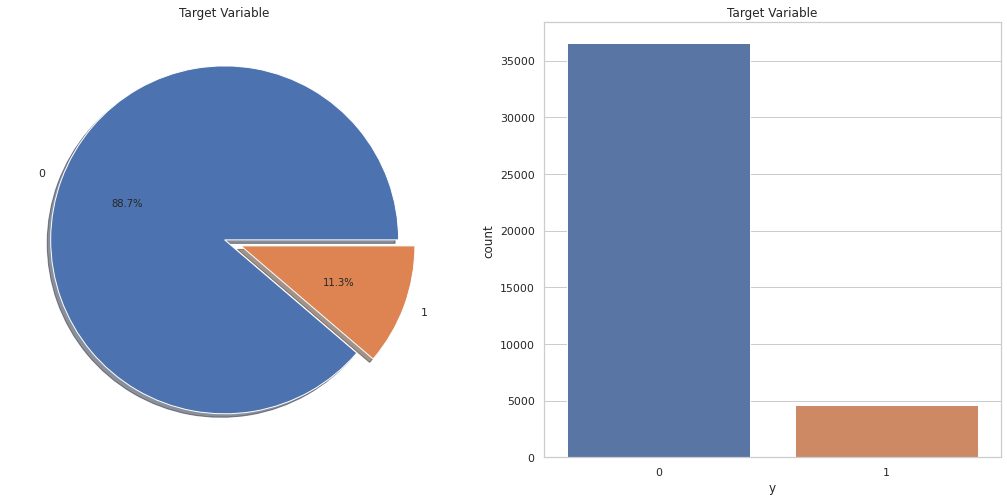

In [12]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df['y'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Target Variable')
ax[0].set_ylabel('')
sns.countplot('y',data=df,ax=ax[1])
ax[1].set_title('Target Variable')
plt.show()


In [13]:
Y = df.groupby('y')[['y']].count()
Y["%"] = ((Y['y'] / Y['y'].sum()) * 100).round(2)
Y.head()

,y,%
y,,
0,36548,88.73
1,4640,11.27


##### What can we observe about the distribution of the target variable

It is unevenly distributed. There are a lot less subscribers than non subscribers.

##### Observe how the different numeric variables behave for the 2 classes

In [14]:
df.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,
0,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


Observations:

- Age: It is slightly higher for those who have subscribed.
- Campaign: It is lower for those who have subscribed, suggesting two potential things. This could indicate that the more a customer is called the less likely they are to subscribe or on the other hand it could be because they keep contacting customers who are simply not interested.
- Pdays: It is lower for those who have subscribed, this potentially indicates that those who have not been previously contacted are less likely to sign up, or/and, the more recently a conversation was held the more likely the customer is to sign up
- Previous: It is higher for those who have subscribed, suggesting it takes multiple calls to convince the customer to sign up
- EVR: It is substantially lower for those who have subscibed, this potentially indicates that customers who are laying off staff are more likely to sign up.
- Euribor: It is lower for those who have subscribed, potentially indicating that customers paying higher interest on their loans are less likely to subscribe.


##### Analyse other variables - Make some plots and discuss them

- **Job title**

In [15]:
df.groupby('job').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
job,,,,,,,,,,,
admin.,38.187296,254.312128,2.623489,954.319229,0.189023,0.015563,93.534054,-40.245433,3.550274,5164.125350,0.129726
blue-collar,39.555760,264.542360,2.558461,985.160363,0.122542,0.248995,93.656656,-41.375816,3.771996,5175.615150,0.068943
entrepreneur,41.723214,263.267857,2.535714,981.267170,0.138736,0.158723,93.605372,-41.283654,3.791120,5176.313530,0.085165
housemaid,45.500000,250.454717,2.639623,960.579245,0.137736,0.433396,93.676576,-39.495283,4.009645,5179.529623,0.100000
management,42.362859,257.058140,2.476060,962.647059,0.185021,-0.012688,93.522755,-40.489466,3.611316,5166.650513,0.112175
retired,62.027326,273.712209,2.476744,897.936047,0.327326,-0.698314,93.430786,-38.573081,2.770066,5122.262151,0.252326
self-employed,39.949331,264.142153,2.660802,976.621393,0.143561,0.094159,93.559982,-40.488107,3.689376,5170.674384,0.104856
services,37.926430,258.398085,2.587805,979.974049,0.154951,0.175359,93.634659,-41.290048,3.699187,5171.600126,0.081381
student,25.894857,283.683429,2.104000,840.217143,0.524571,-1.408000,93.331613,-40.187543,1.884224,5085.939086,0.314286


Text(0, 0.5, 'Customer count')

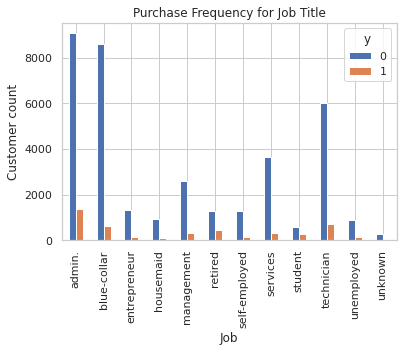

In [16]:
pd.crosstab(df.job,df.y).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Customer count')

Text(0, 0.5, 'Proportion of Customers')

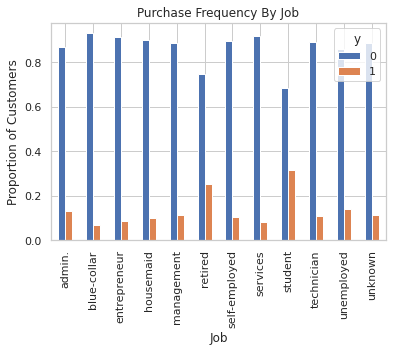

In [17]:
table=pd.crosstab(df.job,df.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar')
plt.title('Purchase Frequency By Job')
plt.xlabel('Job')
plt.ylabel('Proportion of Customers')

- The proportion of customers who are subscribed seems pretty constant apart from for those who do not work but aren't unemployed, i.e. students and pensioners. 

- **Marital status**

In [18]:
df.groupby('marital').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
marital,,,,,,,,,,,
divorced,44.899393,253.790330,2.61340,968.639853,0.168690,0.163985,93.606563,-40.707069,3.715603,5170.878643,0.103209
married,42.307165,257.438623,2.57281,967.247673,0.155608,0.183625,93.597367,-40.270659,3.745832,5171.848772,0.101573
single,33.158714,261.524378,2.53380,949.909578,0.211359,-0.167989,93.517300,-40.918698,3.317447,5155.199265,0.140041
unknown,40.275000,312.725000,3.18750,937.100000,0.275000,-0.221250,93.471250,-40.820000,3.313038,5157.393750,0.150000


Text(0, 0.5, 'Proportion of Customers')

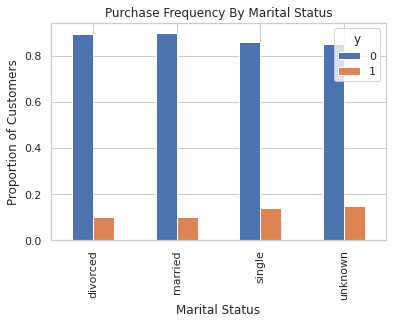

In [19]:
table=pd.crosstab(df.marital,df.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar')
plt.title('Purchase Frequency By Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')

- Marital status does not seem to influence much.

- **Education**

In [20]:
df.groupby('education').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
education,,,,,,,,,,,
basic,42.163910,263.043874,2.559498,974.877967,0.141053,0.191329,93.639933,-40.927595,3.729654,5172.014113,0.087029
high.school,37.998213,260.886810,2.568576,964.358382,0.185917,0.032937,93.584857,-40.940641,3.556157,5164.994735,0.108355
illiterate,48.500000,276.777778,2.277778,943.833333,0.111111,-0.133333,93.317333,-39.950000,3.516556,5171.777778,0.222222
professional.course,40.080107,252.533855,2.586115,960.765974,0.163075,0.173012,93.569864,-40.124108,3.710457,5170.155979,0.113485
university.degree,38.879191,253.223373,2.563527,951.807692,0.192390,-0.028090,93.493466,-39.975805,3.529663,5163.226298,0.137245
unknown,43.481225,262.390526,2.596187,942.830734,0.226459,0.059099,93.658615,-39.877816,3.571098,5159.549509,0.145003


Text(0, 0.5, 'Proportion of Customers')

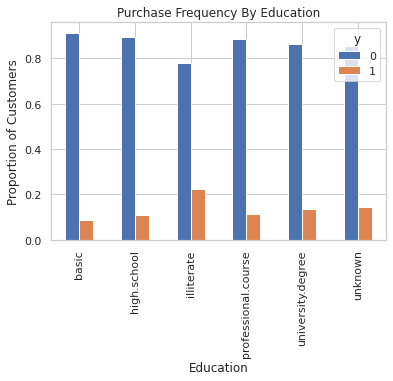

In [21]:
table=pd.crosstab(df.education,df.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar')
plt.title('Purchase Frequency By Education')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')

- Education seems to influence the purchase.

- **Day of Week**

In [22]:
df.groupby('day_of_week').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
day_of_week,,,,,,,,,,,
fri,40.177846,252.748818,2.719944,967.793791,0.177463,0.032337,93.578735,-40.532260,3.566249,5165.109799,0.108087
mon,40.412497,246.568358,2.645760,962.852948,0.171012,0.026063,93.577108,-40.877790,3.542196,5164.568393,0.099483
thu,39.591557,265.674591,2.595268,959.501913,0.174417,0.058460,93.556380,-40.753323,3.574923,5166.662693,0.121188
tue,40.427441,260.455995,2.426823,959.715575,0.173053,0.128220,93.577088,-40.034227,3.701038,5168.486094,0.117800
wed,39.526801,265.883206,2.449840,962.859970,0.169044,0.166745,93.590225,-40.281387,3.726885,5170.425436,0.116671


Text(0, 0.5, 'Proportion of Customers')

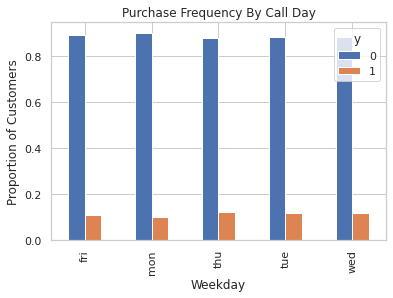

In [23]:
table=pd.crosstab(df.day_of_week,df.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar')
plt.title('Purchase Frequency By Call Day')
plt.xlabel('Weekday')
plt.ylabel('Proportion of Customers')

- Very little difference between each day of the week

- **Month**

In [24]:
df.groupby('month').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
month,,,,,,,,,,,
apr,40.593845,293.200608,1.947188,955.587386,0.323328,-1.800000,93.119558,-46.273632,1.361070,5093.123708,0.204787
aug,41.644221,232.430722,2.666559,961.062156,0.115410,0.747151,93.311065,-35.597184,4.300623,5200.248349,0.106021
dec,47.307692,345.609890,2.159341,748.060440,0.615385,-2.846154,92.715363,-33.708791,0.865319,5031.895604,0.489011
jul,39.035545,273.426122,3.160998,982.700725,0.047115,1.158921,93.894923,-42.370170,4.685678,5214.078575,0.090466
jun,39.766077,242.561301,3.072208,970.221512,0.083114,0.688379,94.245402,-41.579428,4.256908,5197.493193,0.105115
mar,40.778388,245.946886,2.203297,835.454212,0.483516,-1.800000,93.097330,-42.650549,1.162745,5055.390110,0.505495
may,39.031084,261.231752,2.439756,981.120415,0.164209,-0.164972,93.528882,-40.579272,3.293665,5149.521592,0.064347
nov,40.965618,245.855645,1.909290,952.950256,0.293587,-0.418483,93.200943,-41.238747,3.723123,5173.031236,0.101439
oct,44.171309,288.367688,1.545961,781.909471,0.647632,-2.438579,93.175107,-34.580919,1.200123,5018.823816,0.438719


Text(0, 0.5, 'Proportion of Customers')

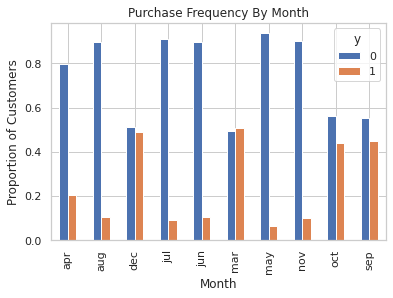

In [25]:
table=pd.crosstab(df.month,df.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar')
plt.title('Purchase Frequency By Month')
plt.xlabel('Month')
plt.ylabel('Proportion of Customers')

- Significant difference from month to month 

- **poutcome**

In [26]:
df.groupby('poutcome').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
poutcome,,,,,,,,,,,
failure,39.946143,248.112888,2.005174,965.976011,1.168627,-1.685442,93.067755,-42.720461,1.651071,5092.589534,0.142286
nonexistent,39.956190,257.082192,2.664145,999.000000,0.000000,0.377091,93.645708,-40.319045,3.958189,5181.203492,0.088322
success,42.023307,320.941733,1.808449,5.587764,1.569556,-2.091260,93.334355,-38.388565,0.996563,5030.622433,0.651129


Text(0, 0.5, 'Proportion of Customers')

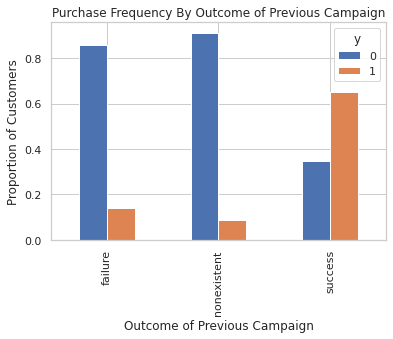

In [27]:
table=pd.crosstab(df.poutcome,df.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar')
plt.title('Purchase Frequency By Outcome of Previous Campaign')
plt.xlabel('Outcome of Previous Campaign')
plt.ylabel('Proportion of Customers')

- 

## Numerical Variables




*   **Age**



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


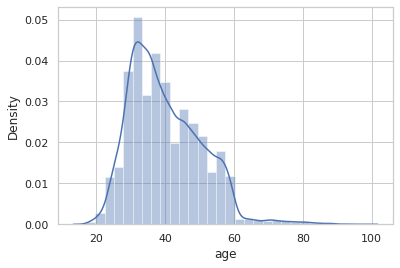

In [28]:
sns.distplot(df['age'], bins=30);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Subscribed')

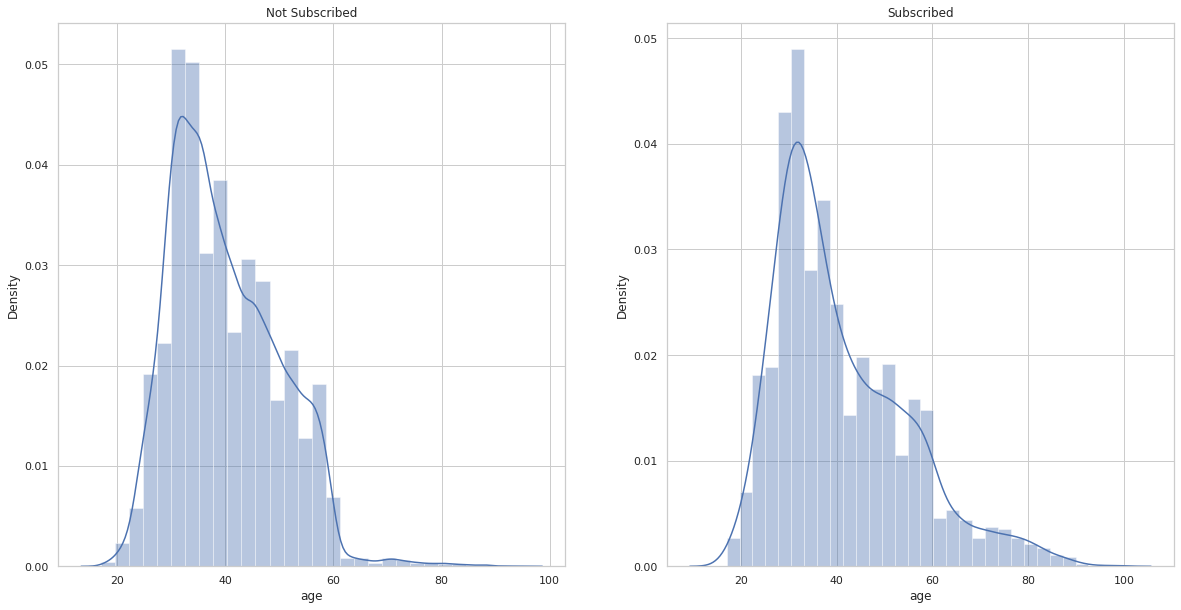

In [29]:
f,ax=plt.subplots(1,2,figsize=(20,10))

sns.distplot(df[df['y']==0]['age'].dropna(), bins=30, ax=ax[0]);
ax[0].set_title('Not Subscribed')

sns.distplot(df[df['y']==1]['age'].dropna(), bins=30, ax=ax[1]);
ax[1].set_title('Subscribed')

In [30]:
df.groupby('age').mean()

,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
age,,,,,,,,,,
17,420.000000,2.200000,401.600000,1.800000,-3.000000,92.247000,-30.500000,0.846600,5064.460000,0.400000
18,321.785714,1.321429,680.142857,0.750000,-2.282143,93.166750,-37.953571,1.026393,5034.467857,0.428571
19,271.500000,2.285714,809.785714,0.666667,-1.869048,93.224119,-42.397619,1.242238,5063.307143,0.476190
20,288.492308,2.353846,861.400000,0.630769,-1.607692,93.257077,-39.515385,1.672508,5080.141538,0.353846
21,264.245098,2.029412,892.117647,0.284314,-1.434314,93.334422,-40.829412,1.866980,5088.063725,0.284314
...,...,...,...,...,...,...,...,...,...,...
91,530.000000,1.500000,999.000000,1.000000,-3.400000,92.379000,-29.800000,0.781000,5017.500000,0.000000
92,527.500000,1.500000,252.750000,2.000000,-1.750000,93.951500,-39.150000,0.796750,5000.150000,0.750000
94,134.000000,1.000000,999.000000,1.000000,-3.400000,92.649000,-30.100000,0.716000,5017.500000,0.000000


* **Duration**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


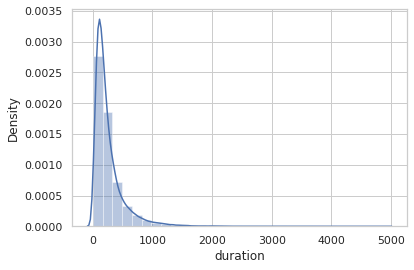

In [31]:
sns.distplot(df['duration'], bins=30);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Subscribed')

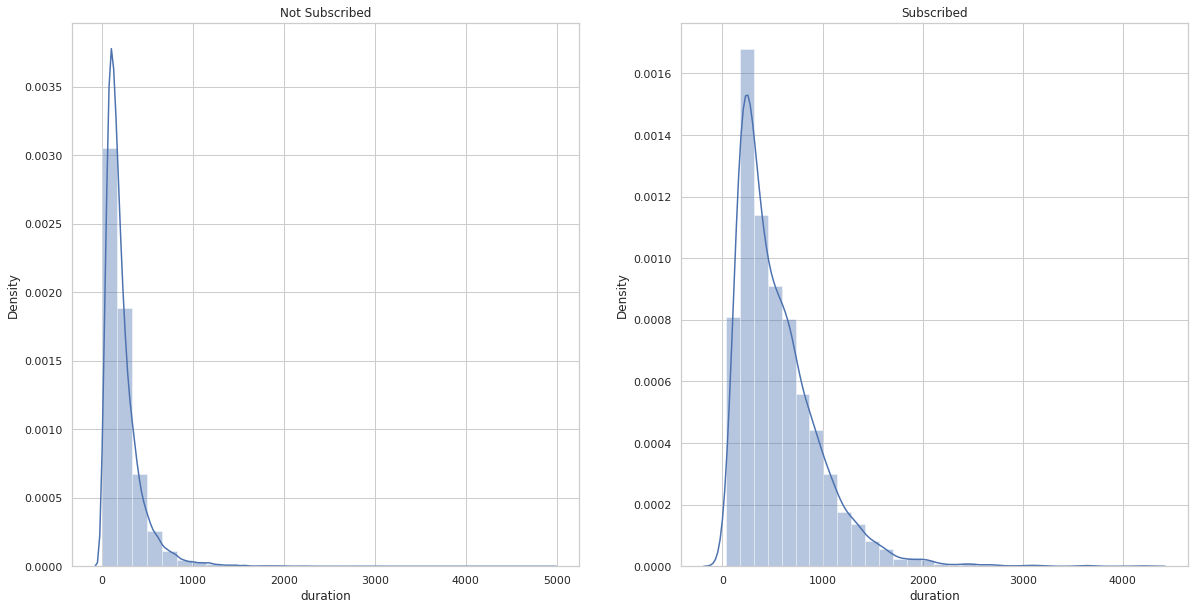

In [32]:
f,ax=plt.subplots(1,2,figsize=(20,10))

sns.distplot(df[df['y']==0]['duration'].dropna(), bins=30, ax=ax[0]);
ax[0].set_title('Not Subscribed')

sns.distplot(df[df['y']==1]['duration'].dropna(), bins=30, ax=ax[1]);
ax[1].set_title('Subscribed')

In [33]:
df.groupby('duration').mean()

,age,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
duration,,,,,,,,,,
0,45.500000,4.750000,999.000000,0.000000,-0.275000,93.351500,-41.450000,3.150000,5154.325000,0.0
1,51.333333,1.000000,669.000000,1.333333,-1.333333,93.824333,-40.700000,1.072667,5008.766667,0.0
2,50.000000,1.000000,999.000000,0.000000,-0.100000,93.200000,-42.000000,4.153000,5195.800000,0.0
3,40.000000,1.666667,999.000000,0.000000,1.100000,93.994000,-36.400000,4.856667,5191.000000,0.0
4,36.000000,3.166667,917.083333,0.083333,-0.466667,94.067333,-40.916667,2.603917,5080.133333,0.0
...,...,...,...,...,...,...,...,...,...,...
3631,37.000000,2.000000,999.000000,0.000000,1.100000,93.994000,-36.400000,4.864000,5191.000000,1.0
3643,31.000000,1.000000,999.000000,0.000000,1.400000,93.918000,-42.700000,4.963000,5228.100000,1.0
3785,27.000000,1.000000,999.000000,0.000000,-1.700000,94.027000,-38.300000,0.888000,4991.600000,0.0


* **campaign**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


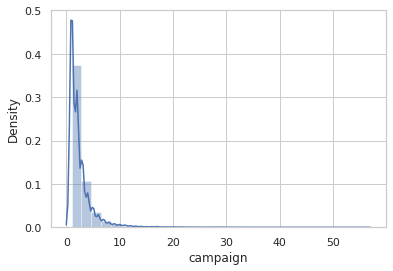

In [34]:
sns.distplot(df['campaign'], bins=30);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Subscribed')

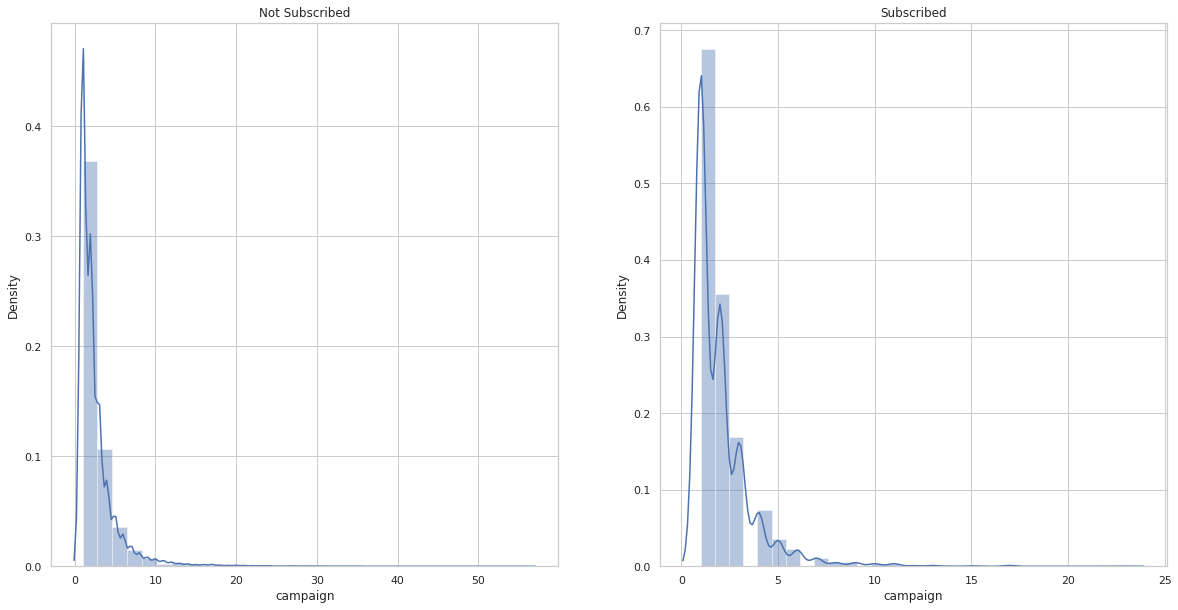

In [35]:
f,ax=plt.subplots(1,2,figsize=(20,10))

sns.distplot(df[df['y']==0]['campaign'].dropna(), bins=30, ax=ax[0]);
ax[0].set_title('Not Subscribed')

sns.distplot(df[df['y']==1]['campaign'].dropna(), bins=30, ax=ax[1]);
ax[1].set_title('Subscribed')

In [36]:
df.groupby('campaign').mean()

,age,duration,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
campaign,,,,,,,,,,
1,40.081623,256.725428,954.132411,0.205589,-0.117022,93.515306,-40.442223,3.429431,5158.543062,0.130371
2,39.966887,279.696973,957.392148,0.189026,0.032299,93.569815,-40.482015,3.578328,5164.611296,0.114570
3,39.825501,270.002060,969.810897,0.137427,0.280715,93.632654,-40.451301,3.809803,5174.957499,0.107471
4,39.962278,251.502075,979.160694,0.128631,0.305206,93.642278,-40.688495,3.822564,5176.362731,0.093927
5,40.132583,227.759225,981.616010,0.107567,0.311194,93.613375,-40.761288,3.825455,5178.184053,0.075047
6,40.367722,225.955056,978.712972,0.131767,0.326251,93.646970,-41.022472,3.824324,5178.819101,0.076609
7,40.108108,223.330684,984.782194,0.093800,0.485851,93.657992,-40.691415,3.999479,5185.707631,0.060413
8,39.385000,189.525000,984.112500,0.087500,0.549000,93.705062,-41.171000,4.044242,5189.874500,0.042500
9,40.674912,211.526502,999.000000,0.038869,0.802473,93.734127,-40.057244,4.352912,5198.411307,0.060071


* **pdays**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


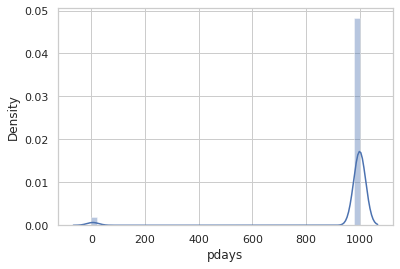

In [37]:
sns.distplot(df['pdays']);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Subscribed')

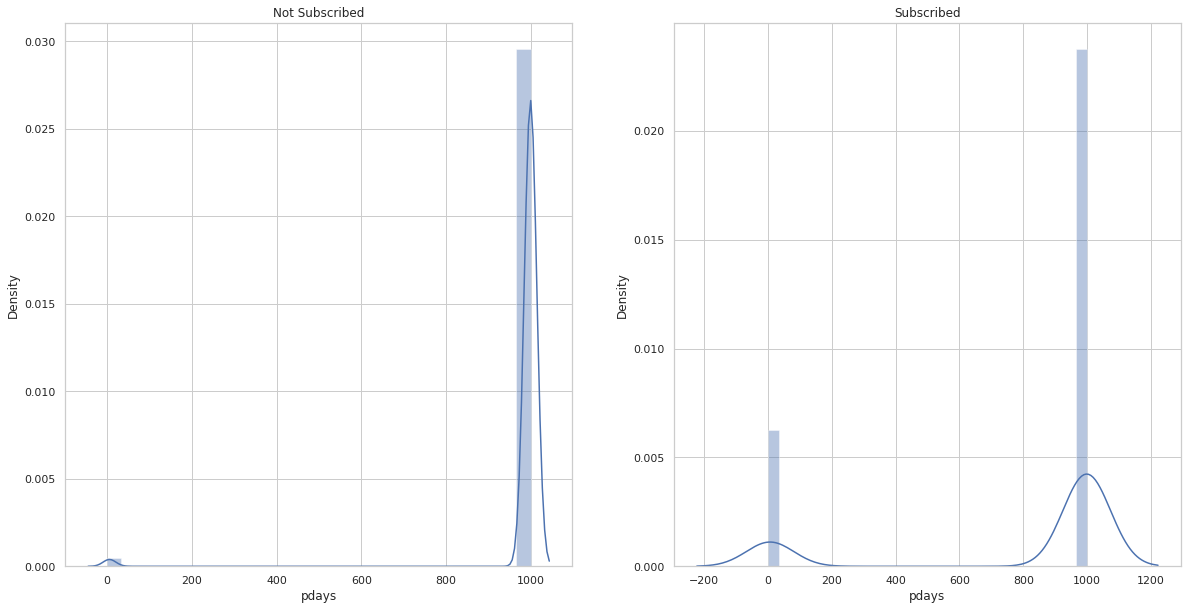

In [38]:
f,ax=plt.subplots(1,2,figsize=(20,10))

sns.distplot(df[df['y']==0]['pdays'].dropna(), bins=30, ax=ax[0]);
ax[0].set_title('Not Subscribed')

sns.distplot(df[df['y']==1]['pdays'].dropna(), bins=30, ax=ax[1]);
ax[1].set_title('Subscribed')

In [39]:
df.groupby('pdays').mean()

,age,duration,campaign,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
pdays,,,,,,,,,,
0,36.066667,294.866667,1.333333,2.000000,-1.513333,93.650733,-41.080000,1.451533,5047.493333,0.666667
1,38.576923,272.807692,1.730769,1.730769,-1.915385,93.147769,-42.103846,1.325154,5065.500000,0.307692
2,43.967213,362.360656,1.540984,1.508197,-2.080328,93.090410,-42.001639,1.126984,5066.937705,0.606557
3,43.164009,291.988610,1.774487,1.715262,-2.281321,93.245850,-38.012984,0.968087,5030.078815,0.678815
4,40.601695,270.152542,1.745763,1.533898,-2.524576,92.778364,-34.613559,1.107085,5057.950000,0.533898
5,40.304348,388.478261,1.630435,1.630435,-1.704348,93.384609,-41.134783,1.421739,5055.534783,0.630435
6,42.978155,325.893204,1.958738,1.696602,-1.965777,93.541117,-37.407767,0.913570,5012.015291,0.701456
7,42.433333,311.516667,1.616667,1.800000,-2.540000,93.175583,-35.135000,0.799483,5015.823333,0.666667
8,39.833333,478.444444,1.888889,1.722222,-2.405556,93.192167,-36.450000,0.888500,5019.750000,0.666667


* **Previous**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


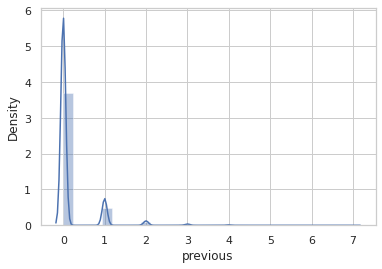

In [40]:
sns.distplot(df['previous'], bins=30);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Subscribed')

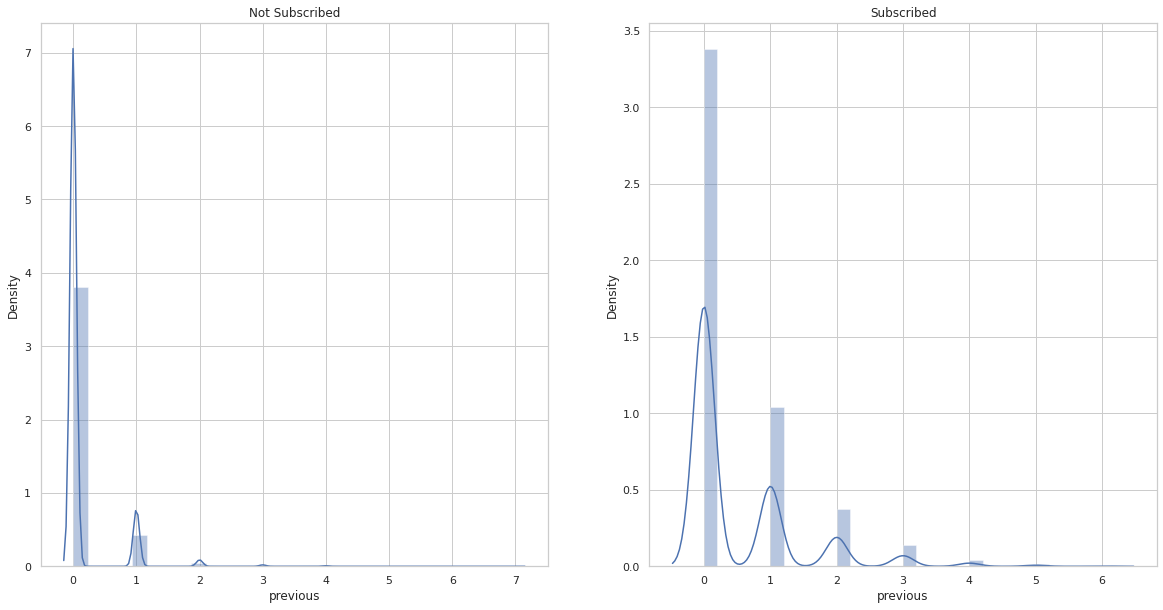

In [41]:
f,ax=plt.subplots(1,2,figsize=(20,10))

sns.distplot(df[df['y']==0]['previous'].dropna(), bins=30, ax=ax[0]);
ax[0].set_title('Not Subscribed')

sns.distplot(df[df['y']==1]['previous'].dropna(), bins=30, ax=ax[1]);
ax[1].set_title('Subscribed')

In [42]:
df.groupby('previous').mean()

,age,duration,campaign,pdays,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
previous,,,,,,,,,,
0,39.956190,257.082192,2.664145,999.000000,0.377091,93.645708,-40.319045,3.958189,5181.203492,0.088322
1,40.120588,257.226924,1.972155,810.685157,-1.737338,93.045436,-42.271037,1.626421,5091.197654,0.212015
2,42.160477,302.149867,1.905836,465.700265,-2.085146,93.351248,-38.840186,0.938995,5028.999735,0.464191
3,40.375000,307.087963,1.888889,235.722222,-1.841204,93.798843,-39.075000,0.843843,4996.031019,0.592593
4,43.371429,308.071429,1.800000,176.157143,-1.558571,94.043829,-40.244286,0.845943,4988.304286,0.542857
5,38.722222,304.611111,1.833333,115.000000,-1.466667,94.171667,-41.477778,0.844278,4984.855556,0.722222
6,53.000000,186.800000,1.800000,201.800000,-1.460000,94.323000,-43.300000,0.958400,4980.400000,0.600000
7,51.000000,283.000000,1.000000,3.000000,-1.100000,94.767000,-50.800000,1.049000,4963.600000,0.000000


**Employement Variation Rate**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


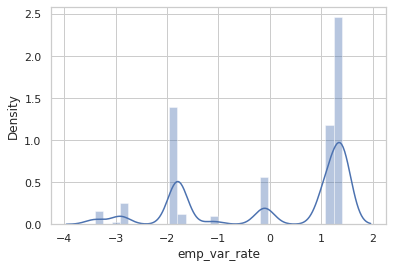

In [43]:
sns.distplot(df['emp_var_rate'], bins=30);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Subscribed')

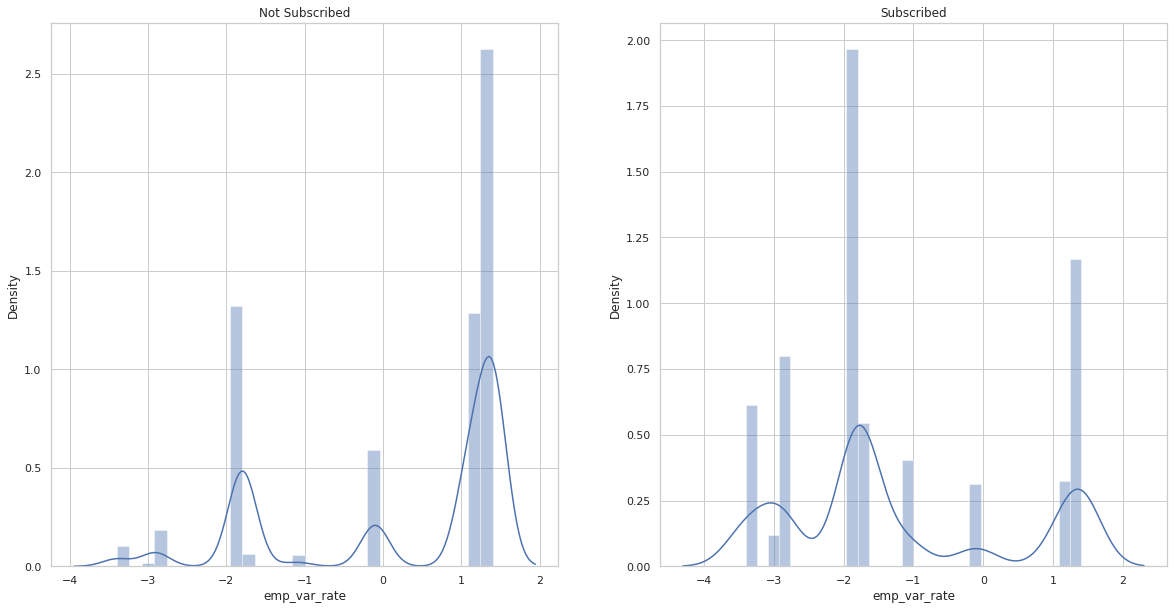

In [44]:
f,ax=plt.subplots(1,2,figsize=(20,10))

sns.distplot(df[df['y']==0]['emp_var_rate'].dropna(), bins=30, ax=ax[0]);
ax[0].set_title('Not Subscribed')

sns.distplot(df[df['y']==1]['emp_var_rate'].dropna(), bins=30, ax=ax[1]);
ax[1].set_title('Subscribed')

In [45]:
df.groupby('emp_var_rate').mean()

,age,duration,campaign,pdays,previous,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
emp_var_rate,,,,,,,,,,
-3.4,45.490196,274.387488,1.693744,774.341737,0.606909,92.490703,-28.689636,0.740901,5017.500000,0.423903
-3.0,47.610465,358.668605,2.226744,733.470930,0.645349,92.713000,-33.000000,0.712523,5023.500000,0.511628
-2.9,40.492483,253.218882,1.785328,860.363199,0.408900,92.557304,-35.676969,1.051574,5076.200000,0.357186
-1.8,38.486934,266.205575,2.222997,950.029834,0.367596,92.992767,-45.866964,1.291119,5092.701916,0.159081
-1.7,40.945666,301.712807,1.943079,644.793014,1.051746,94.110933,-39.549030,0.830157,4991.600000,0.521345
-1.1,41.176378,309.234646,1.822047,638.092913,1.193701,94.442641,-44.036063,0.949876,4963.600000,0.474016
-0.2,42.100000,121.000000,1.000000,999.000000,0.100000,92.756000,-45.900000,3.493400,5176.300000,0.100000
-0.1,40.649471,242.943524,1.895194,989.545751,0.199566,93.210879,-41.970893,4.129610,5195.800000,0.062992
1.1,40.327580,265.111297,2.512560,999.000000,0.000000,93.994000,-36.400000,4.857663,5191.000000,0.030916


**Consumer Price Index**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


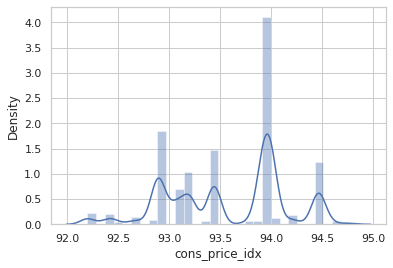

In [46]:
sns.distplot(df['cons_price_idx'], bins=30);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Subscribed')

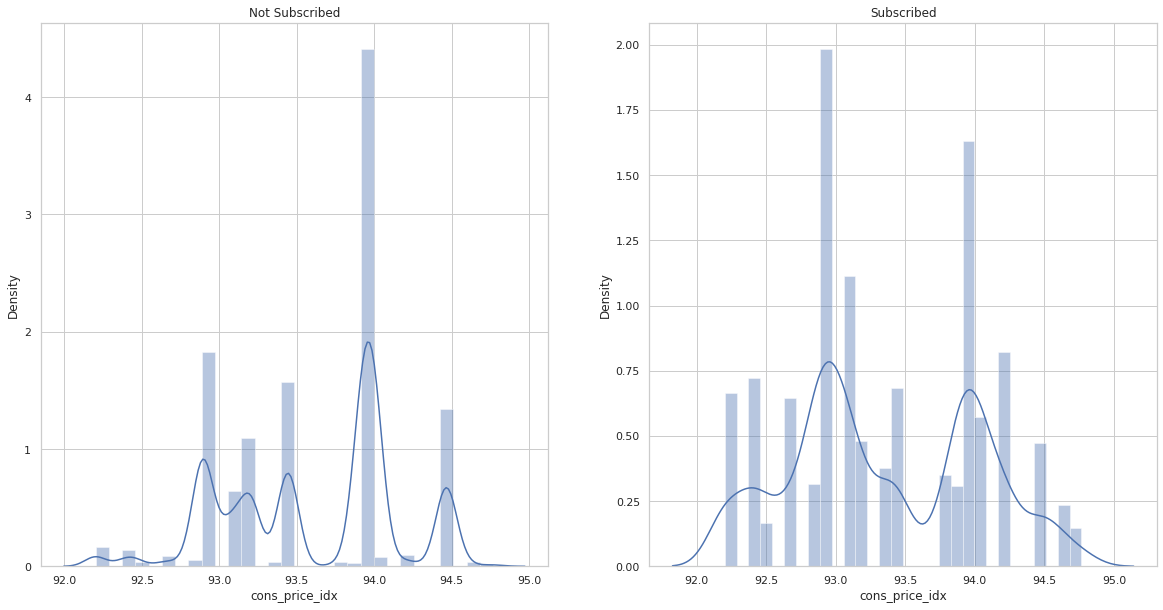

In [47]:
f,ax=plt.subplots(1,2,figsize=(20,10))

sns.distplot(df[df['y']==0]['cons_price_idx'].dropna(), bins=30, ax=ax[0]);
ax[0].set_title('Not Subscribed')

sns.distplot(df[df['y']==1]['cons_price_idx'].dropna(), bins=30, ax=ax[1]);
ax[1].set_title('Subscribed')

In [48]:
df.groupby('cons_price_idx').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_conf_idx,euribor3m,nr_employed,y
cons_price_idx,,,,,,,,,,
92.201,43.610390,249.927273,1.724675,809.329870,0.545455,-2.9,-31.4,0.866087,5076.2,0.342857
92.379,47.363296,281.250936,1.677903,790.318352,0.494382,-3.4,-29.8,0.783052,5017.5,0.397004
92.431,45.671141,279.807606,1.521253,832.243848,0.503356,-3.4,-26.9,0.735497,5017.5,0.402685
92.469,40.230337,289.589888,2.185393,926.786517,0.258427,-2.9,-33.6,1.025219,5076.2,0.370787
92.649,43.862745,262.467787,1.921569,689.893557,0.820728,-3.4,-30.1,0.716143,5017.5,0.470588
92.713,47.610465,358.668605,2.226744,733.470930,0.645349,-3.0,-33.0,0.712523,5023.5,0.511628
92.756,42.100000,121.000000,1.000000,999.000000,0.100000,-0.2,-45.9,3.493400,5176.3,0.100000
92.843,39.627660,215.904255,2.510638,984.953901,0.085106,-1.8,-50.0,1.646220,5099.1,0.446809
92.893,37.110632,253.906973,2.362444,970.914739,0.341733,-1.8,-46.2,1.293571,5099.1,0.090438


**Consumer Confidence Index**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


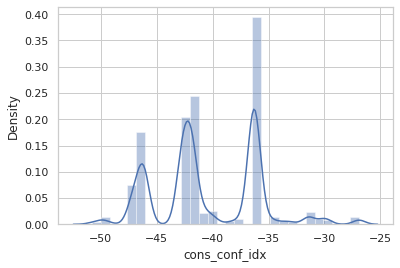

In [49]:
sns.distplot(df['cons_conf_idx'], bins=30);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Subscribed')

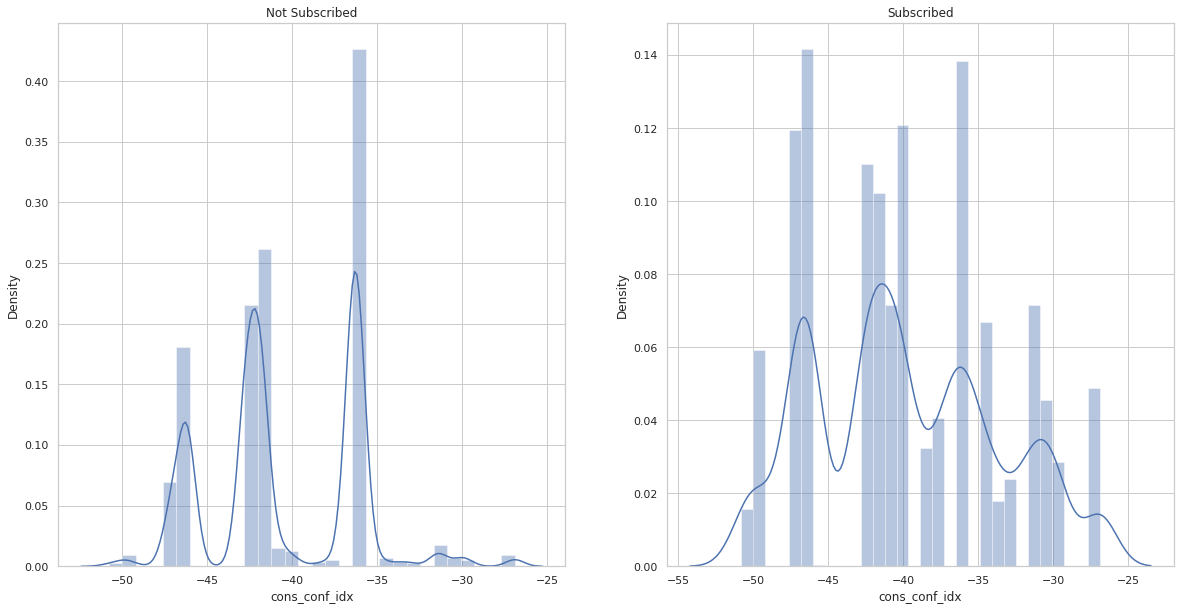

In [50]:
f,ax=plt.subplots(1,2,figsize=(20,10))

sns.distplot(df[df['y']==0]['cons_conf_idx'].dropna(), bins=30, ax=ax[0]);
ax[0].set_title('Not Subscribed')

sns.distplot(df[df['y']==1]['cons_conf_idx'].dropna(), bins=30, ax=ax[1]);
ax[1].set_title('Subscribed')

In [51]:
df.groupby('cons_conf_idx').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,euribor3m,nr_employed,y
cons_conf_idx,,,,,,,,,,
-50.8,40.968750,331.632812,1.804688,657.757812,1.390625,-1.1,94.767,1.042227,4963.6,0.453125
-50.0,39.627660,215.904255,2.510638,984.953901,0.085106,-1.8,92.843,1.646220,5099.1,0.446809
-49.5,42.573529,290.769608,1.779412,600.318627,1.166667,-1.1,94.601,0.995235,4963.6,0.455882
-47.1,40.169243,291.105777,1.935720,971.875102,0.295362,-1.8,93.075,1.411722,5099.1,0.179821
-46.2,37.110632,253.906973,2.362444,970.914739,0.341733,-1.8,92.893,1.293571,5099.1,0.090438
-45.9,42.100000,121.000000,1.000000,999.000000,0.100000,-0.2,92.756,3.493400,5176.3,0.100000
-42.7,38.857741,271.384892,3.235752,999.000000,0.000000,1.4,93.918,4.961587,5228.1,0.060883
-42.0,40.679480,241.179204,1.911781,989.370575,0.202710,-0.1,93.200,4.114895,5195.8,0.052544
-41.8,40.279607,238.793324,3.357339,999.000000,0.000000,1.4,94.465,4.931639,5228.1,0.042981


**euribor3m**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


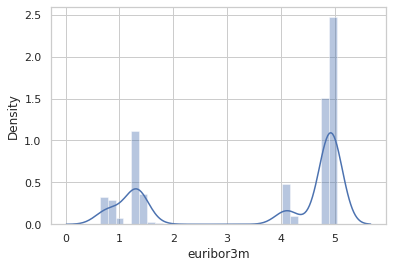

In [52]:
sns.distplot(df['euribor3m'], bins=30);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Subscribed')

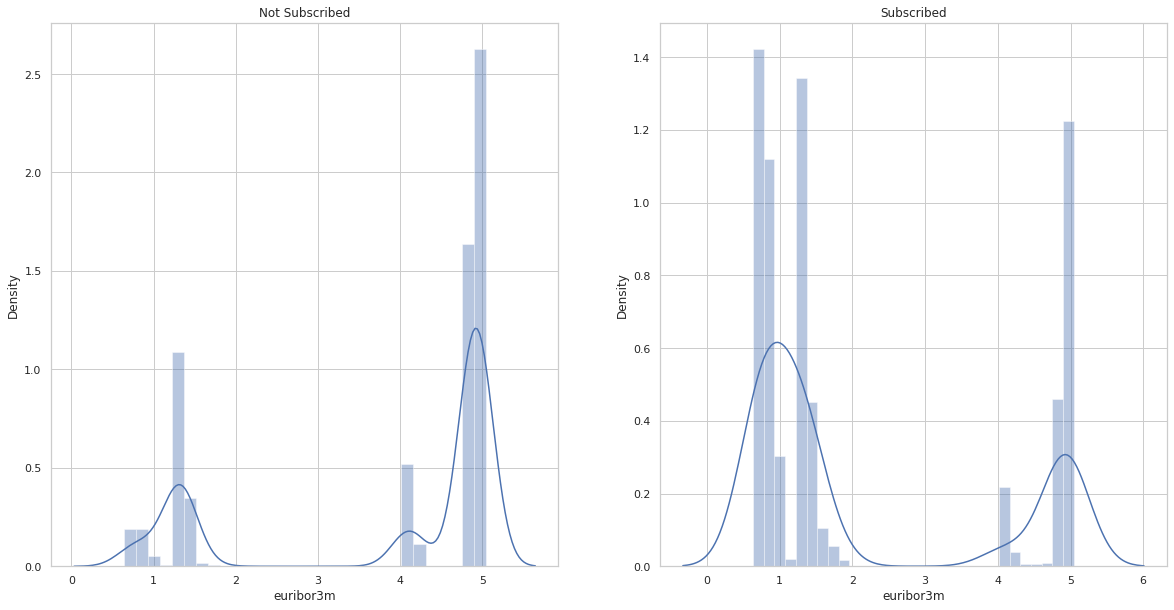

In [53]:
f,ax=plt.subplots(1,2,figsize=(20,10))

sns.distplot(df[df['y']==0]['euribor3m'].dropna(), bins=30, ax=ax[0]);
ax[0].set_title('Not Subscribed')

sns.distplot(df[df['y']==1]['euribor3m'].dropna(), bins=30, ax=ax[1]);
ax[1].set_title('Subscribed')

In [54]:
df.groupby('euribor3m').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,nr_employed,y
euribor3m,,,,,,,,,,
0.634,50.375000,249.875000,1.125000,750.625000,0.750000,-1.800000,93.369000,-34.800000,5008.700000,0.750000
0.635,46.418605,236.255814,1.930233,745.116279,0.976744,-1.800000,93.466209,-34.748837,5008.700000,0.511628
0.636,43.500000,236.000000,1.642857,857.214286,0.571429,-1.800000,93.369000,-34.800000,5008.700000,0.214286
0.637,29.666667,190.166667,1.166667,502.000000,0.833333,-1.800000,93.369000,-34.800000,5008.700000,0.833333
0.638,50.285714,181.285714,2.714286,716.000000,0.857143,-1.800000,93.749000,-34.600000,5008.700000,0.714286
...,...,...,...,...,...,...,...,...,...,...
4.967,41.116641,253.894246,2.511664,999.000000,0.000000,1.400000,94.064857,-39.566096,5228.100000,0.051322
4.968,40.703629,216.989919,4.108871,999.000000,0.002016,1.383367,93.682058,-39.407762,5227.741835,0.057460
4.970,44.465116,246.784884,1.540698,999.000000,0.000000,1.400000,93.444000,-36.100000,5228.100000,0.023256


**Number of employees**


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


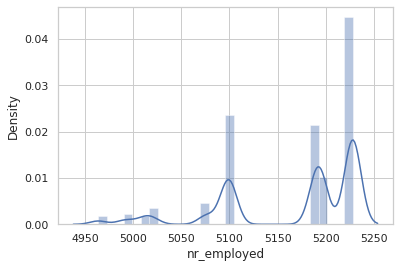

In [55]:
sns.distplot(df['nr_employed'], bins=30);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Subscribed')

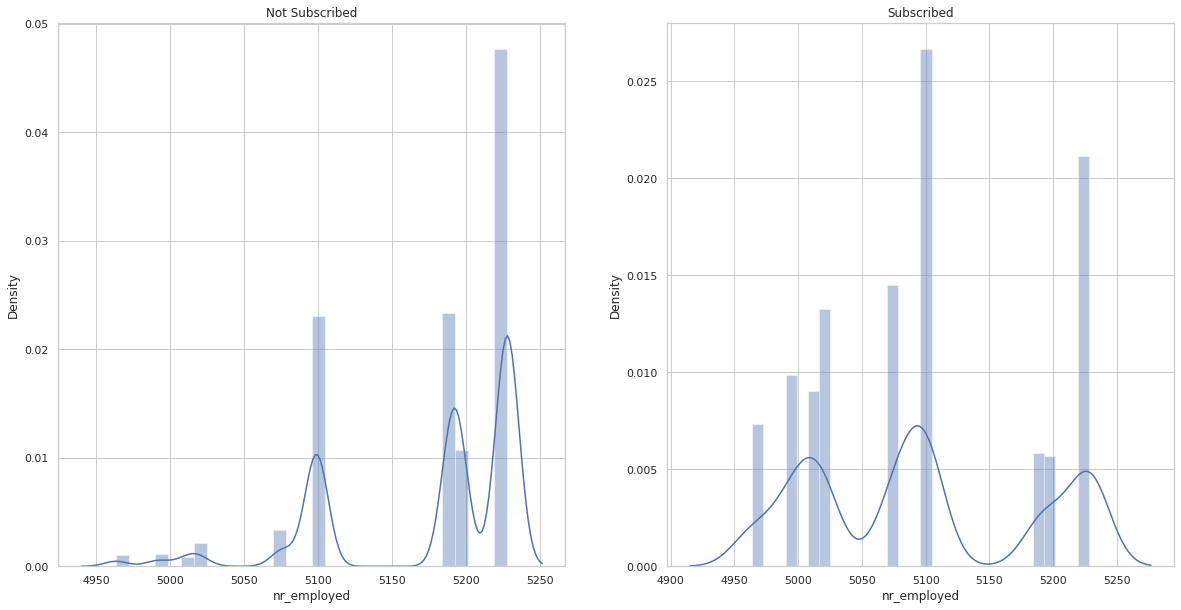

In [56]:
f,ax=plt.subplots(1,2,figsize=(20,10))

sns.distplot(df[df['y']==0]['nr_employed'].dropna(), bins=30, ax=ax[0]);
ax[0].set_title('Not Subscribed')

sns.distplot(df[df['y']==1]['nr_employed'].dropna(), bins=30, ax=ax[1]);
ax[1].set_title('Subscribed')

In [57]:
df.groupby('nr_employed').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,y
nr_employed,,,,,,,,,,
4963.6,41.176378,309.234646,1.822047,638.092913,1.193701,-1.1,94.442641,-44.036063,0.949876,0.474016
4991.6,40.945666,301.712807,1.943079,644.793014,1.051746,-1.7,94.110933,-39.549030,0.830157,0.521345
5008.7,43.898462,303.495385,1.941538,666.104615,0.993846,-1.8,93.636083,-36.442462,0.659134,0.567692
5017.5,45.490196,274.387488,1.693744,774.341737,0.606909,-3.4,92.490703,-28.689636,0.740901,0.423903
5023.5,47.610465,358.668605,2.226744,733.470930,0.645349,-3.0,92.713000,-33.000000,0.712523,0.511628
5076.2,40.492483,253.218882,1.785328,860.363199,0.408900,-2.9,92.557304,-35.676969,1.051574,0.357186
5099.1,38.074760,263.365362,2.244434,971.655261,0.319897,-1.8,92.943768,-46.584790,1.339254,0.127959
5176.3,42.100000,121.000000,1.000000,999.000000,0.100000,-0.2,92.756000,-45.900000,3.493400,0.100000
5191.0,40.327580,265.111297,2.512560,999.000000,0.000000,1.1,93.994000,-36.400000,4.857663,0.030916


Checking for multicolinearity

<function matplotlib.pyplot.show>

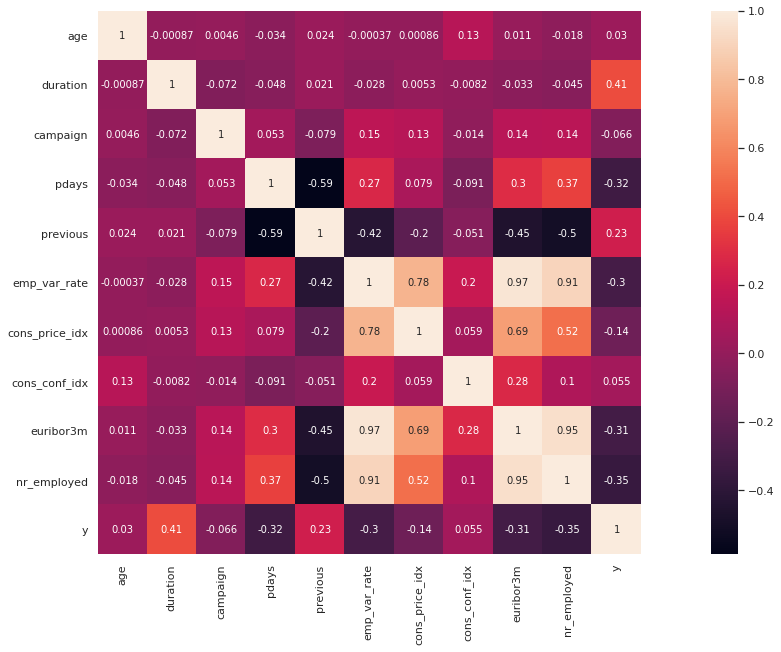

In [58]:
correlation=df.corr(method='pearson')
plt.figure(figsize=(25,10))
sns.heatmap(correlation,vmax=1,square= True,annot=True)
plt.show

Since 'emp_var_rate' , 'cons_price_idx' , 'euribor3m' and 'nr_employed' are all highly correlated I have decided to remove them as to avoid multicolinearity.

In [59]:
df=df.drop(['duration','emp_var_rate','cons_price_idx','euribor3m','nr_employed'], axis=1)

<function matplotlib.pyplot.show>

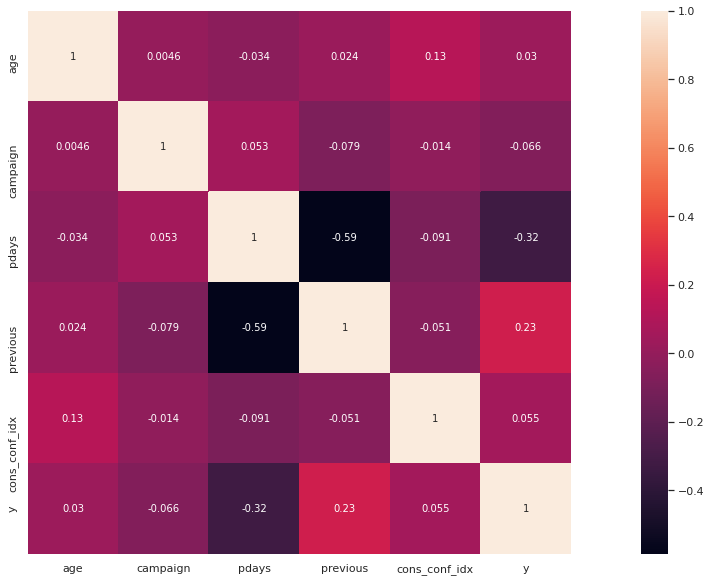

In [61]:
correlation=df.corr(method='pearson')
plt.figure(figsize=(25,10))
sns.heatmap(correlation,vmax=1,square= True,annot=True)
plt.show

In [64]:
df=df.drop(['pdays'], axis=1)

### Create dummy variables

In [65]:
df.dtypes

age                int64
job               object
marital           object
education         object
default           object
housing           object
loan              object
contact           object
month             object
day_of_week       object
campaign           int64
previous           int64
poutcome          object
cons_conf_idx    float64
y                  int64
dtype: object

In [66]:
df = pd.get_dummies(df, columns=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome'])
df.head()

,age,campaign,previous,cons_conf_idx,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,44,1,0,-36.1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,53,1,0,-42.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
2,28,3,2,-39.8,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
3,39,2,0,-47.1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,55,1,1,-31.4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [67]:
df.dtypes

age                                int64
campaign                           int64
previous                           int64
cons_conf_idx                    float64
y                                  int64
job_admin.                         uint8
job_blue-collar                    uint8
job_entrepreneur                   uint8
job_housemaid                      uint8
job_management                     uint8
job_retired                        uint8
job_self-employed                  uint8
job_services                       uint8
job_student                        uint8
job_technician                     uint8
job_unemployed                     uint8
job_unknown                        uint8
marital_divorced                   uint8
marital_married                    uint8
marital_single                     uint8
marital_unknown                    uint8
education_basic                    uint8
education_high.school              uint8
education_illiterate               uint8
education_profes

In [68]:
df.columns.values

array(['age', 'campaign', 'previous', 'cons_conf_idx', 'y', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'marital_unknown', 'education_basic',
       'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown',
       'default_yes', 'housing_no', 'housing_unknown', 'housing_yes',
       'loan_no', 'loan_unknown', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'month_apr', 'month_aug', 'month_dec',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep', 'day_of_week_fri', 'day_of_week_mon',
       'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed',
      

### Implement the Logistic Regression Model

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


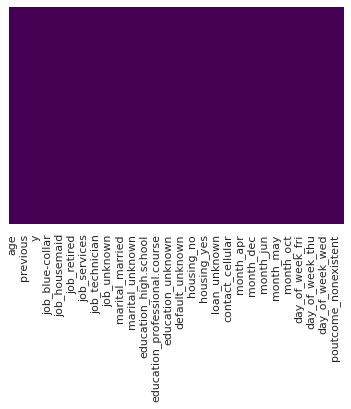

In [70]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

##### Prepare the dataset for training

First dataset

In [73]:
X = df.drop('y', axis = 1) # Set of features
y = df['y'] # Put your code here # Target variable

# Split training and test - test size: 30% random state = 0
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.3, random_state = 0)

# Create an instance of the model 
logmodel = LogisticRegression()

#Fit the model
logmodel.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

##### Compute predictions and accuracy using the accuracy score provided by the sklearn library

In [74]:
from sklearn.metrics import accuracy_score

y_pred = logmodel.predict(X_test)
a = accuracy_score(y_test, y_pred)
print(a)

0.8985999838148417


In [75]:
score = logmodel.score(X_test, y_test)
print(score)

0.8985999838148417


##### An accuracy of **91%** looks quite a good result, but have a look more in detail observing the confusion matrix and other metrics you consider interesting.


##### EXPLAIN WHY ACCURACY IS NOT ENOUGH TO EVALUATE THE PERFORMANCE OF A CLASSIFIER AND WHY IT MIGHT FAIL IN CASE OF IMBALANCED DATASET


----






The confusion matrics gives an interesting overview of how well a model is doing and it is a great starting point for any classification model evaluation.

![](https://skappal7.files.wordpress.com/2018/08/confusion-matrix.jpg?w=748)

In [76]:
from sklearn.metrics import confusion_matrix
#Compute the confusion matrix
confusion_matrix(y_test, y_pred)

array([[10845,   136],
       [ 1117,   259]])

In [77]:
pd.crosstab(y_test, y_pred, rownames=['Test'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
Test,,,
0,10845,136,10981
1,1117,259,1376
All,11962,395,12357


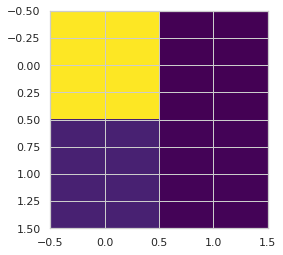

In [78]:
conf = confusion_matrix(y_test, y_pred)
plt.imshow(conf, cmap='viridis', interpolation='None')
plt.show()


**Is our model obtaining good results or is it failing in some specific case?**

Since our dataset is imbalanced we are obtaining many true negative's. More notably we are also getting a lot of type two erros. This is not ideal since we are trying to identify who will subscribe and in this case we are missing individuals who would be willing to sign up.




##### Compute other metrics using classification report

In [79]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     10981
           1       0.66      0.19      0.29      1376

    accuracy                           0.90     12357
   macro avg       0.78      0.59      0.62     12357
weighted avg       0.88      0.90      0.87     12357



#### Remember:
    
**Precision:** percentage of your results which are relevant. Among all the elements that your model classify as positive, how many are really positive examples?

$\frac{TP}{TP+FP}$
                                            

**Recall:** percentage of total relevant results correctly classified by your algorithm.

$\frac{TP}{TP+FN}$                                            

## Imbalanced Classes

Imbalanced data typically refers to a problem with classification problems where the classes are not represented equally.


##### Explain why imbalanced data can be a problem 

It can be a problem because machine learning algorithms tend to see the skewness and assign the majority class to most --> FALSE NEGATIVE
Though it also poses the problem of FALSE POSITIVE it is less worrying and bad.


##### SMOTE

During the exploratory data analysis we have seen that we have **Imbalanced Classes**, i.e.,the percentage of negative examples is much higher with respect to the percentage of positiv examples. Indeed, observing the confusion matrix we saw that the implmented model face some problem in predict the positive examples (if a client will subscribe a term deposit).


To face this problem we will apply an over-sampling technique trying to balance our dataset generating **Synthetic Samples:** it consists in creating new synthetic points from the minority class to increase its cardinality.

we will use the **SMOTE** Algorithm [see here for more details](https://arxiv.org/pdf/1106.1813.pdf).

In order to apply SMOTE **install the imblearn python library** (if you already have it you do not need to reinstall):

[Follow this instructions](https://imbalanced-learn.readthedocs.io/en/stable/install.html)


### Now implent again the model following all the steps

Prepare the data

In [81]:
data_final = df
X = data_final.loc[:, data_final.columns != 'y']
y = data_final.loc[:, data_final.columns == 'y']

##### Apply SMOTE to generate synthetic data

In [82]:
from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0)

# Create training and test set - test size:30% random_state=0
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.3, random_state = 0)

columns = X_train.columns

# Apply oversampling ONLY ON training data
os_data_X,os_data_y= os.fit_sample(X_train, y_train)

os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])

# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of subscription",len(os_data_y[os_data_y['y']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)

length of oversampled data is  51134
Number of no subscription in oversampled data 25567
Number of subscription 25567
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


**Notice that we over-sampled only on the training data**

##### Check if the classes in the dataset now are balanced

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


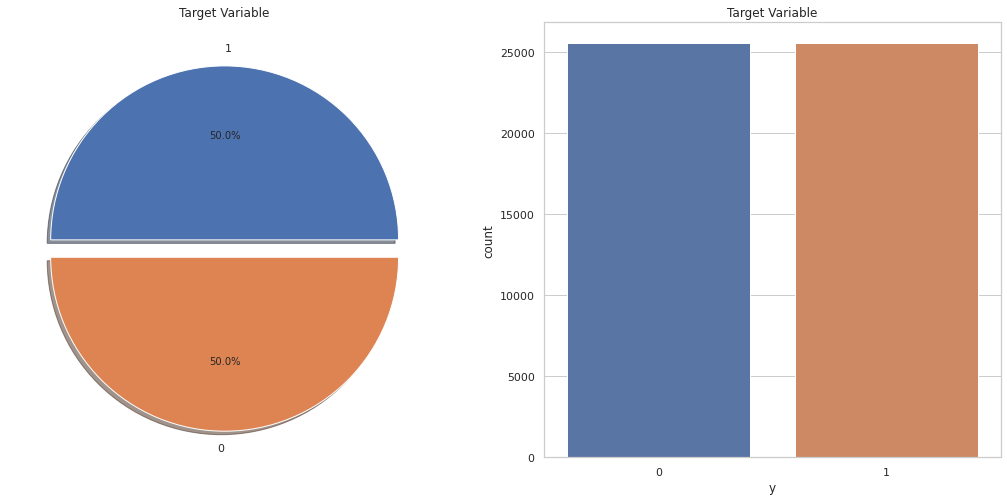

In [83]:
f,ax=plt.subplots(1,2,figsize=(18,8))
os_data_y['y'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Target Variable')
ax[0].set_ylabel('')
sns.countplot('y',data=os_data_y,ax=ax[1])
ax[1].set_title('Target Variable')
plt.show()


They are prefectly distributed!!

##### Implement the model

In [85]:

# Prepare thedata qith the oversampled dataset
X = df.drop('y', axis = 1)
y = df['y']

# Create training and test
X_train, X_test, y_train, y_test = train_test_split( os_data_X,os_data_y, test_size = 0.3, random_state = 0)

# Create an instance of the logistic regression model
logreg = LogisticRegression()

#Fit the model
logreg.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#### Model Evaluation: evaluate the model and compare with previous implmentation/evaluation

In [87]:
#Compute predictions
from sklearn.metrics import accuracy_score

y_pred_reg = logreg.predict(X_test)
b = accuracy_score(y_test, y_pred_reg)
print(b)

# score returns the mean accuracy on the given test data and labels.
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

0.7157290919757513
Accuracy of logistic regression classifier on test set: 0.72


The total accuracy decreases. Is our model obtaining poorer results? Have a deeper look analysing confusion matrix and classification report

In [89]:
# Confusion Matrix
confusion_matrix(y_test, y_pred_reg)

array([[6233, 1433],
       [2928, 4747]])

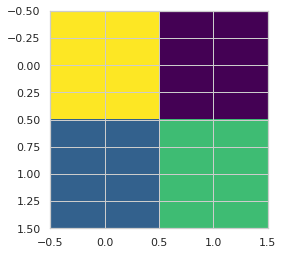

In [91]:
conf = confusion_matrix(y_test, y_pred_reg)
plt.imshow(conf, cmap='viridis', interpolation='None')
plt.show()

Analysing the confusion matriix we can observe that now our model is able to predict quite weel both positive and negative examples!! Let's see if this is also confirmed looking at precision and recall

In [88]:
#classification_report
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_reg))

              precision    recall  f1-score   support

           0       0.68      0.81      0.74      7666
           1       0.77      0.62      0.69      7675

    accuracy                           0.72     15341
   macro avg       0.72      0.72      0.71     15341
weighted avg       0.72      0.72      0.71     15341



The support is the number of occurrences of each class in y_test.



##### Discuss the obtained results!

Though the results may not be as accurate as the previous model, we can see that there are many more correct predictions of people who well subscribe to the term deposit. For the bank this is much better as they are going to have a lot less customers not get contacted since they don't get ignored by the biast model. We still could make the results better as we only have an accuracy of 70 or so %. 